In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', None)

import seaborn as sns
import matplotlib.pyplot as plt


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/ames-housing-dataset/AmesHousing.csv


In [2]:
trainAmes=pd.read_csv('/kaggle/input/ames-housing-dataset/AmesHousing.csv')
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

Checking the Ames Dataset. The Housing dataset is actually a sub part of the Ames dataset

In [5]:
trainAmes.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
1   NaN       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
2   NaN       IR1          Lvl    AllPub     Corner        Gtl        NAmes   
3   NaN       Reg          Lvl    AllPub     Corner        Gtl        NAmes   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm      1Fam      1Story             6             5   
1       Feedr        Norm      1Fam      1Story             5             6   
2        Norm        Norm      1Fam      1Story             6             6   
3        Norm        Norm      1Fam      1Story             7             5   
4        Norm        Norm      1Fam      2Story             5             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1960            1960        Hip   CompShg      BrkFace      Plywood   
1        1961            1961      Gable   CompShg      VinylSd      VinylSd   
2        1958            1958        Hip   CompShg      Wd Sdng      Wd Sdng   
3        1968            1968        Hip   CompShg      BrkFace      BrkFace   
4        1997            1998      Gable   CompShg      VinylSd      VinylSd   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0        Stone         112.0         TA         TA     CBlock        TA   
1         None           0.0         TA         TA     CBlock        TA   
2      BrkFace         108.0         TA         TA     CBlock        TA   
3         None           0.0         Gd         TA     CBlock        TA   
4         None           0.0         TA         TA      PConc        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        Gd            Gd            BLQ         639.0            Unf   
1        TA            No            Rec         468.0            LwQ   
2        TA            No            ALQ         923.0            Unf   
3        TA            No            ALQ        1065.0            Unf   
4        TA            No            GLQ         791.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        441.0         1080.0    GasA         Fa           Y   
1         144.0        270.0          882.0    GasA         TA           Y   
2           0.0        406.0         1329.0    GasA         TA           Y   
3           0.0       1045.0         2110.0    GasA         Ex           Y   
4           0.0        137.0          928.0    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr        1656           0                0         1656   
1      SBrkr         896           0                0          896   
2      SBrkr        1329           0                0         1329   
3      SBrkr        2110           0                0         2110   
4      SBrkr         928         701                0         1629   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             1.0             0.0          1          0              3   
1             0.0             0.0          1          0              2   
2             0.0             0.0          1          1              3   
3             1.0             0.0

Making all the columns similar to the Housing Dataset

In [6]:
trainAmes.columns = trainAmes.columns.str.replace(' ', '')
trainAmes=trainAmes.rename(columns={"YearRemod/Add": "YearRemodAdd"})

In [7]:
trainAmes.head()

Order        PID  MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0      1  526301100          20       RL        141.0    31770   Pave   NaN   
1      2  526350040          20       RH         80.0    11622   Pave   NaN   
2      3  526351010          20       RL         81.0    14267   Pave   NaN   
3      4  526353030          20       RL         93.0    11160   Pave   NaN   
4      5  527105010          60       RL         74.0    13830   Pave   NaN   

  LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
1      Reg         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
2      IR1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
3      Reg         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
4      IR1         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            6            5       1960   
1       Norm     1Fam     1Story            5            6       1961   
2       Norm     1Fam     1Story            6            6       1958   
3       Norm     1Fam     1Story            7            5       1968   
4       Norm     1Fam     2Story            5            5       1997   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1960       Hip  CompShg     BrkFace     Plywood      Stone   
1          1961     Gable  CompShg     VinylSd     VinylSd       None   
2          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
3          1968       Hip  CompShg     BrkFace     BrkFace       None   
4          1998     Gable  CompShg     VinylSd     VinylSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       112.0        TA        TA     CBlock       TA       Gd           Gd   
1         0.0        TA        TA     CBlock       TA       TA           No   
2       108.0        TA        TA     CBlock       TA       TA           No   
3         0.0        Gd        TA     CBlock       TA       TA           No   
4         0.0        TA        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          BLQ       639.0          Unf         0.0      441.0       1080.0   
1          Rec       468.0          LwQ       144.0      270.0        882.0   
2          ALQ       923.0          Unf         0.0      406.0       1329.0   
3          ALQ      1065.0          Unf         0.0     1045.0       2110.0   
4          GLQ       791.0          Unf         0.0      137.0        928.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Fa          Y      SBrkr      1656         0             0   
1    GasA        TA          Y      SBrkr       896         0             0   
2    GasA        TA          Y      SBrkr      1329         0             0   
3    GasA        Ex          Y      SBrkr      2110         0             0   
4    GasA        Gd          Y      SBrkr       928       701             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1656           1.0           0.0         1         0             3   
1        896           0.0           0.0         1         0             2   
2       1329           0.0           0.0         1         1             3   
3       2110           1.0           0.0         2         1             3   
4       1629           0.0           0.0         2         1             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             7        Typ           2          Gd   
1             1          TA             5        Typ           0         NaN   
2             1          Gd        

In [8]:
print("Size of the Ames Dataset",len(trainAmes))
print("Size of the Housing Dataset",len(train))
print("Size of the Housing Test Dataset",len(test))

Size of the Ames Dataset 2930
Size of the Housing Dataset 1460
Size of the Housing Test Dataset 1459


Finding the duplicates in the dataset and removing them

In [9]:
data=pd.concat([trainAmes,train,test], axis=0, sort=False)
print("Size of the Housing Dataset",len(data))

Size of the Housing Dataset 5849


In [10]:
useless = ['Id','PID','Order','SalePrice'] 
data = data.drop(useless, axis = 1)

In [11]:
duplicate = data[data.duplicated(keep='last')].index
len(duplicate)

392

In [12]:
duplicate[382:]

Int64Index([2828, 2841, 2843, 2878, 2883, 2900, 2901, 2902, 193, 829], dtype='int64')

In [13]:
duplicate[390:]

Int64Index([193, 829], dtype='int64')

we want to delete duplicates till index 2902 which means only from the Ames dataset because this same data is in the test set and we cannot use that for training

In [14]:
duplicate=duplicate[0:390]

In [15]:
duplicate[386:]

Int64Index([2883, 2900, 2901, 2902], dtype='int64')

In [16]:
trainAmes = trainAmes.drop(duplicate, axis = 0)

In [17]:
print('Length of the Ames Dataset now',len(trainAmes))

Length of the Ames Dataset now 2540


In [18]:
training=pd.concat([trainAmes,train], axis=0, sort=False)
useless = ['Id','PID','Order'] 
training = training.drop(useless, axis = 1)

Now starting Data Analysis

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


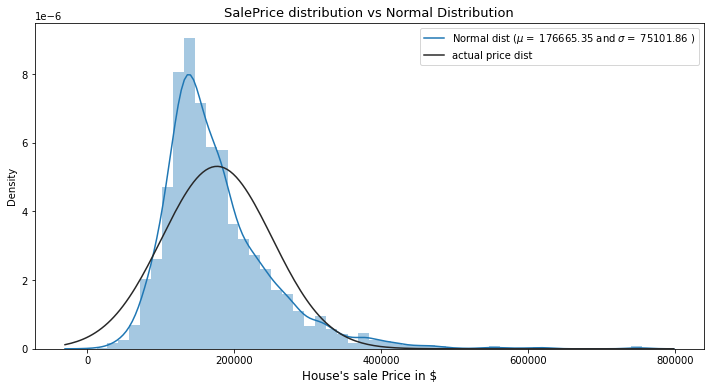

In [19]:
from scipy.stats import norm

(mu, sigma) = norm.fit(training['SalePrice'])
plt.figure(figsize = (12,6))
sns.distplot(training['SalePrice'], kde = True, hist=True, fit = norm)
plt.title('SalePrice distribution vs Normal Distribution', fontsize = 13)
plt.xlabel("House's sale Price in $", fontsize = 12)
plt.legend(['Normal dist ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma),'actual price dist'],loc='best')
plt.show()

In papers, acceptable values for skewness are between -0.5 and 0.5 while -2 and 2 for Kurtosis. Looking at the plot, we can clearly see how the distribution does not seem to be normal, but highly right-skewed. The non-normality of our distribution is also supported by the Shapiro test for normality (p-value really small that allows us to reject the hypotesis of normality). Despite that, let's leave it like that for now, we are dealing with this later in this notebook.

In [20]:
from scipy import stats

shap = stats.shapiro(training['SalePrice'])
print('Skewness : %f' % abs(training['SalePrice']).skew())
print('Kurtosis : %f' % abs(training['SalePrice']).kurt())
print('Shapiro_Test_statistic : %f' % shap.statistic )
print('Shapiro_Test_pvalue : %f' % shap.pvalue )

Skewness : 1.877872
Kurtosis : 6.813984
Shapiro_Test_statistic : 0.873338
Shapiro_Test_pvalue : 0.000000


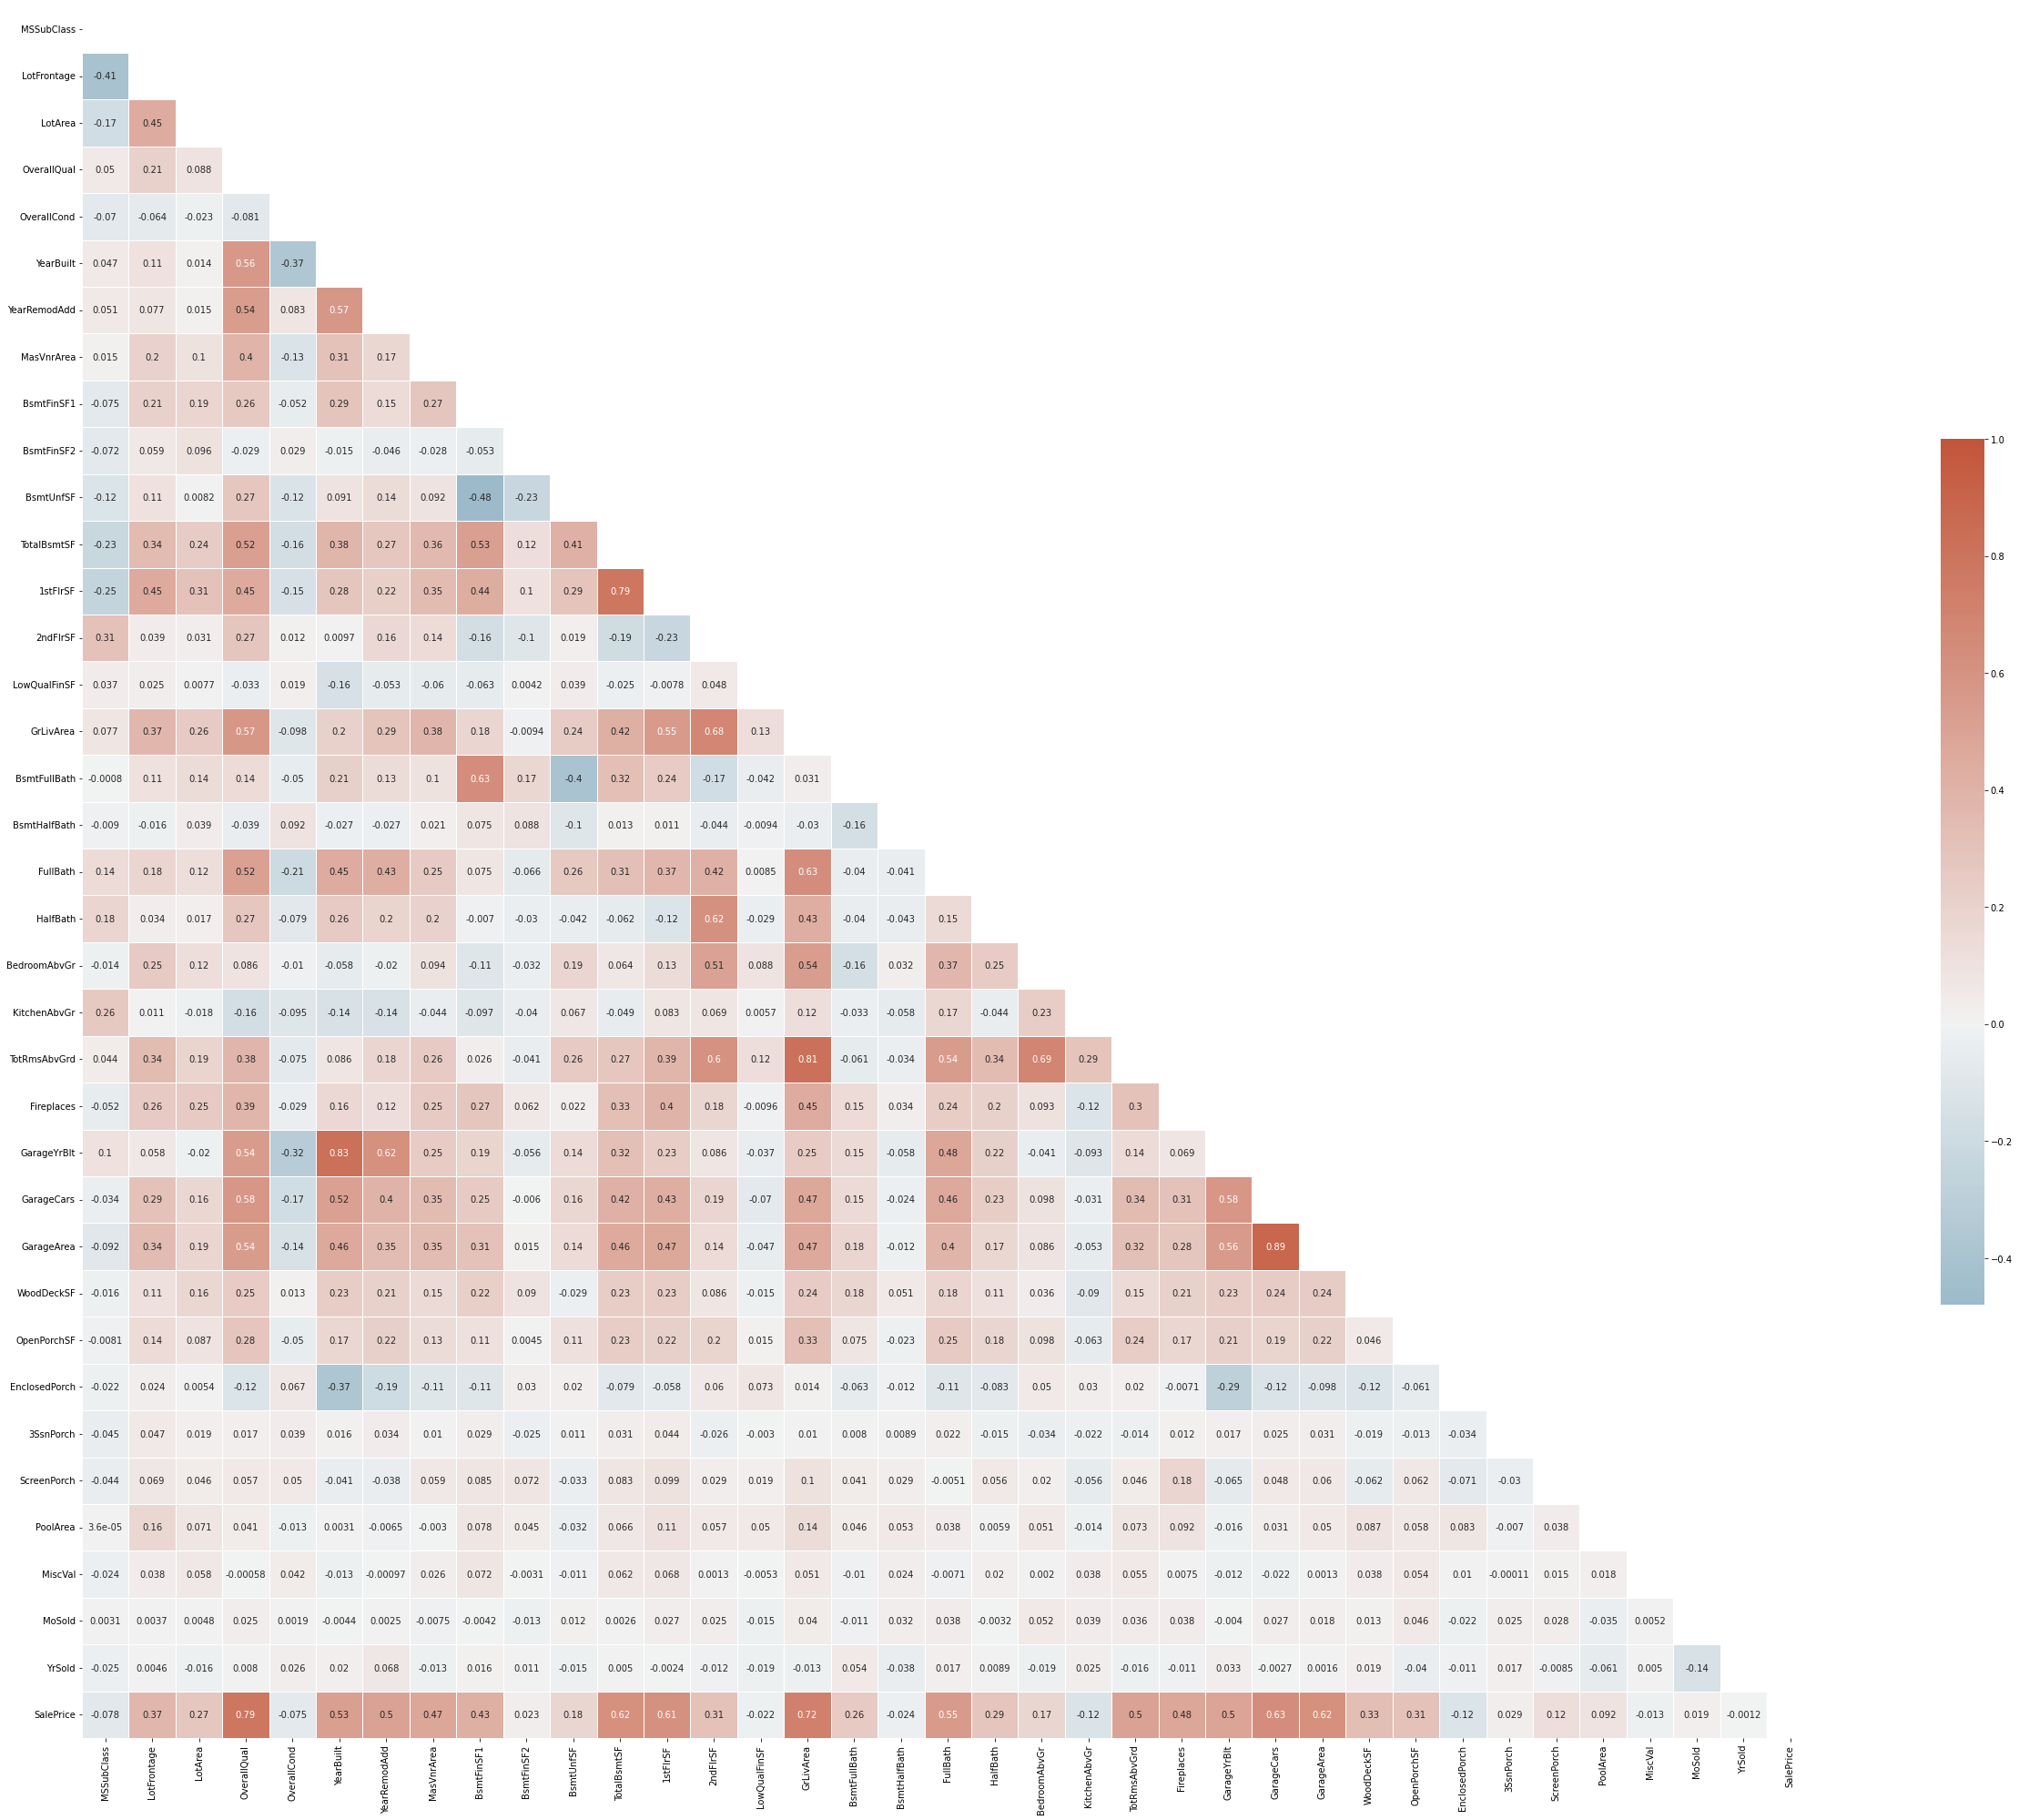

In [21]:
f, ax = plt.subplots(figsize=(50, 35))
mat = training.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

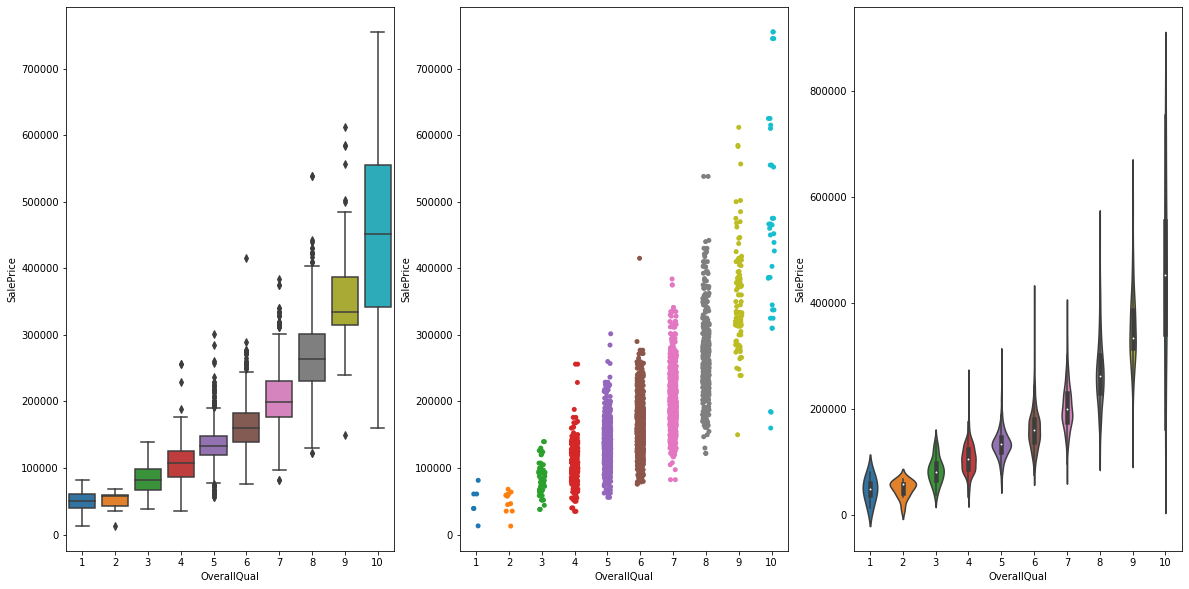

In [22]:
# OverallQuall - SalePrice [Pearson = 0.8]
fig,ax=plt.subplots(1,3,figsize=(20,10))
sns.stripplot(data=training,x='OverallQual',y='SalePrice',ax=ax[1])
sns.violinplot(data=training,x='OverallQual',y='SalePrice',ax=ax[2])
sns.boxplot(data=training,x='OverallQual',y='SalePrice',ax=ax[0])
plt.show()

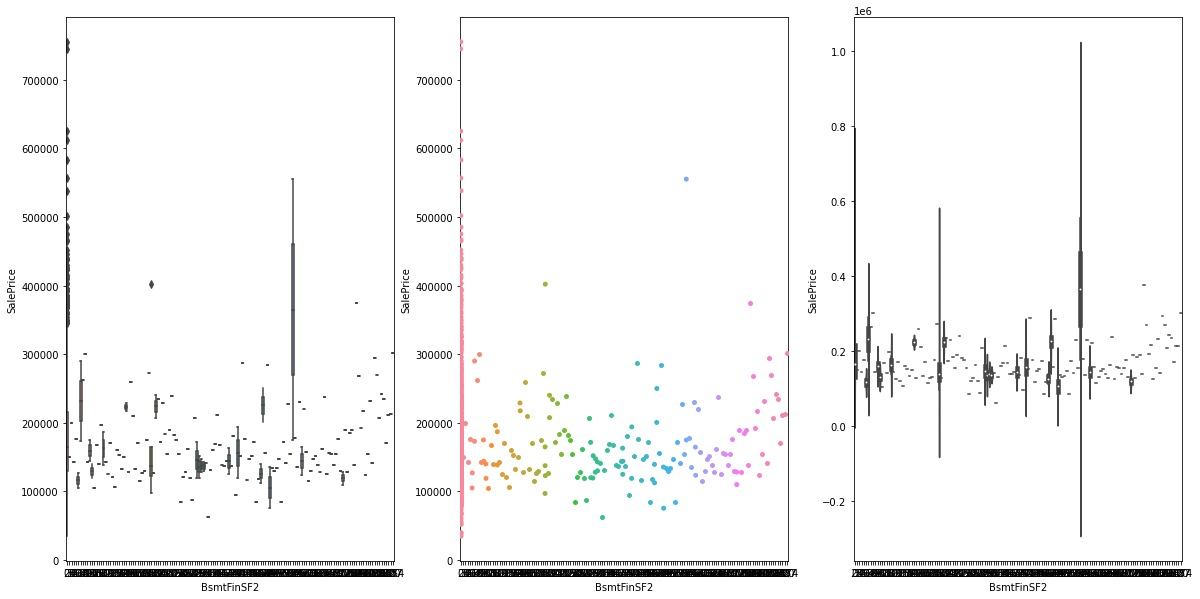

In [23]:
# OverallQuall - SalePrice [Pearson = -0.011]
fig,ax=plt.subplots(1,3,figsize=(20,10))
sns.stripplot(data=train,x='BsmtFinSF2',y='SalePrice',ax=ax[1])
sns.violinplot(data=train,x='BsmtFinSF2',y='SalePrice',ax=ax[2])
sns.boxplot(data=train,x='BsmtFinSF2',y='SalePrice',ax=ax[0])
plt.show()

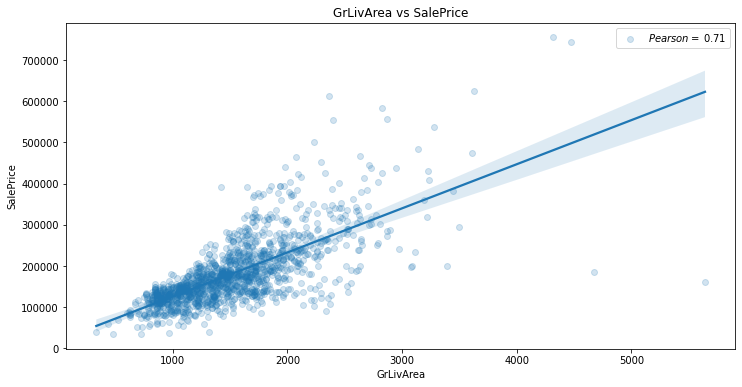

In [24]:
# GrLivArea vs SalePrice [corr = 0.71]

Pearson_GrLiv = 0.71
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'GrLivArea', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('GrLivArea vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_GrLiv)], loc = 'best')
plt.show()

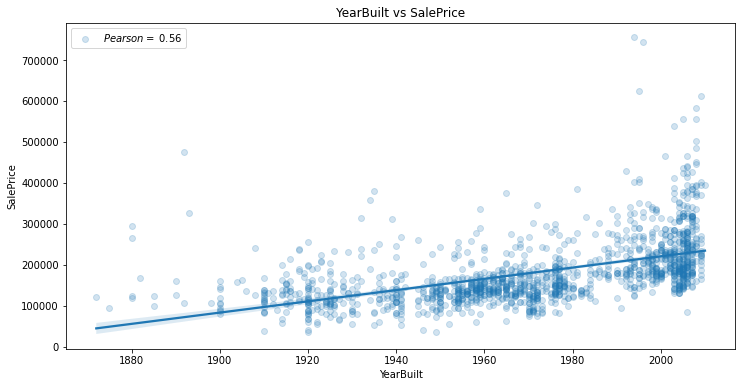

In [25]:
# YearBuilt vs SalePrice

Pearson_YrBlt = 0.56
plt.figure(figsize = (12,6))
sns.regplot(data=train, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2})
plt.title('YearBuilt vs SalePrice', fontsize = 12)
plt.legend(['$Pearson=$ {:.2f}'.format(Pearson_YrBlt)], loc = 'best')
plt.show()

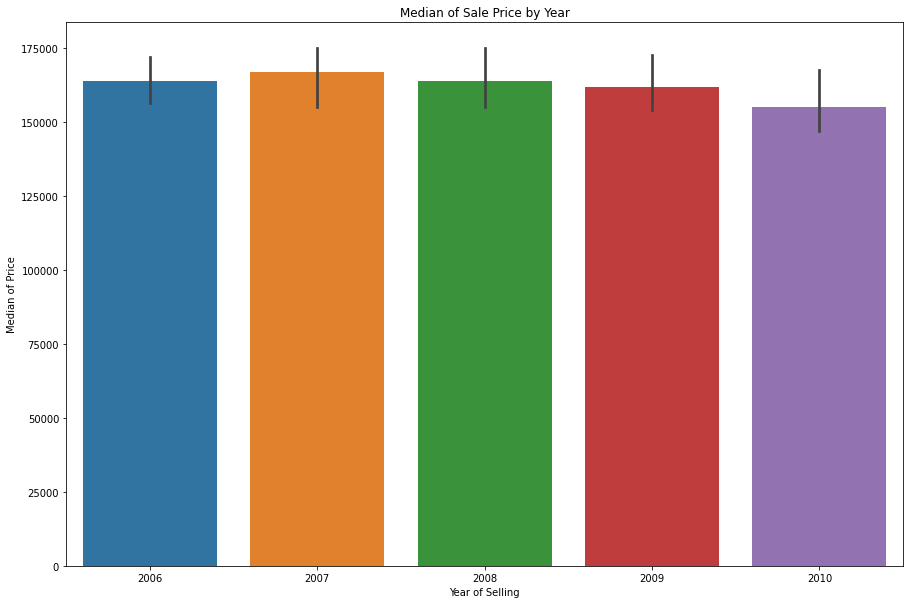

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(x='YrSold',y='SalePrice',data=train,estimator=np.median)
plt.title('Median of Sale Price by Year')
plt.xlabel('Year of Selling')
plt.ylabel('Median of Price')
plt.show()

In [27]:
# Separating Target and Features

target = training['SalePrice']
test_id = test['Id']
test = test.drop(['Id'],axis = 1)
training2 = training.drop(['SalePrice'], axis = 1)


# Concatenating train & test set

train_test = pd.concat([training2,test], axis=0, sort=False)

In [28]:
len(train_test)

5459

Checking for Nan values

In [29]:
nan=pd.DataFrame(train_test.isna().sum(),columns=['Nan_sum'])
nan['feat']=nan.index
nan=nan[nan['Nan_sum']>0]
nan['Percentage']=(nan['Nan_sum']/1460)*100
nan['Percentage of total data']=(nan['Nan_sum']/5459)*100
nan=nan.sort_values(by=['Nan_sum'])
nan.insert(0,'Serial No.',range(1,len(nan)+1))
nan

Serial No.  Nan_sum          feat  Percentage  \
TotalBsmtSF            1        1   TotalBsmtSF    0.068493   
KitchenQual            2        1   KitchenQual    0.068493   
BsmtUnfSF              3        1     BsmtUnfSF    0.068493   
BsmtFinSF2             4        1    BsmtFinSF2    0.068493   
BsmtFinSF1             5        1    BsmtFinSF1    0.068493   
SaleType               6        1      SaleType    0.068493   
Exterior2nd            7        1   Exterior2nd    0.068493   
Exterior1st            8        1   Exterior1st    0.068493   
GarageArea             9        2    GarageArea    0.136986   
GarageCars            10        2    GarageCars    0.136986   
Functional            11        2    Functional    0.136986   
Electrical            12        2    Electrical    0.136986   
Utilities             13        2     Utilities    0.136986   
BsmtHalfBath          14        3  BsmtHalfBath    0.205479   
BsmtFullBath          15        3  BsmtFullBath    0.205479   
MSZoning              16        4      MSZoning    0.273973   
MasVnrArea            17       35    MasVnrArea    2.397260   
MasVnrType            18       36    MasVnrType    2.465753   
BsmtFinType1          19      154  BsmtFinType1   10.547945   
BsmtFinType2          20      156  BsmtFinType2   10.684932   
BsmtQual              21      156      BsmtQual   10.684932   
BsmtCond              22      157      BsmtCond   10.753425   
BsmtExposure          23      159  BsmtExposure   10.890411   
GarageType            24      299    GarageType   20.479452   
GarageCond            25      303    GarageCond   20.753425   
GarageQual            26      303    GarageQual   20.753425   
GarageYrBlt           27      303   GarageYrBlt   20.753425   
GarageFinish          28      303  GarageFinish   20.753425   
LotFrontage           29      950   LotFrontage   65.068493   
FireplaceQu           30     2661   FireplaceQu  182.260274   
Fence                 31     4347         Fence  297.739726   
Alley                 32     5095         Alley  348.972603   
MiscFeature           33     5254   MiscFeature  359.863014   
PoolQC                34     5437        PoolQC  372.397260   

              Percentage of total data  
TotalBsmtSF                   0.018318  
KitchenQual                   0.018318  
BsmtUnfSF                     0.018318  
BsmtFinSF2                    0.018318  
BsmtFinSF1                    0.018318  
SaleType                      0.018318  
Exterior2nd                   0.018318  
Exterior1st                   0.018318  
GarageArea                    0.036637  
GarageCars                    0.036637  
Functional                    0.036637  
Electrical                    0.036637  
Utilities                     0.036637  
BsmtHalfBath                  0.054955  
BsmtFullBath                  0.054955  
MSZoning                      0.073273  
MasVnrArea                    0.641143  
MasVnrType                    0.659461  
BsmtFinType1                  2.821029  
BsmtFinType2                  2.857666  
BsmtQual                      2.857666  
BsmtCond                      2.875985  
BsmtExposure                  2.912621  
GarageType                    5.477194  
GarageCond                    5.550467  
GarageQual                    5.550467  
GarageYrBlt                   5.550467  
GarageFinish                  5.550467  
LotFrontage                  17.402455  
FireplaceQu                  48.745191  
Fence                        79.629969  
Alley                        93.332112  
MiscFeature                  96.244733  
PoolQC                       99.596996

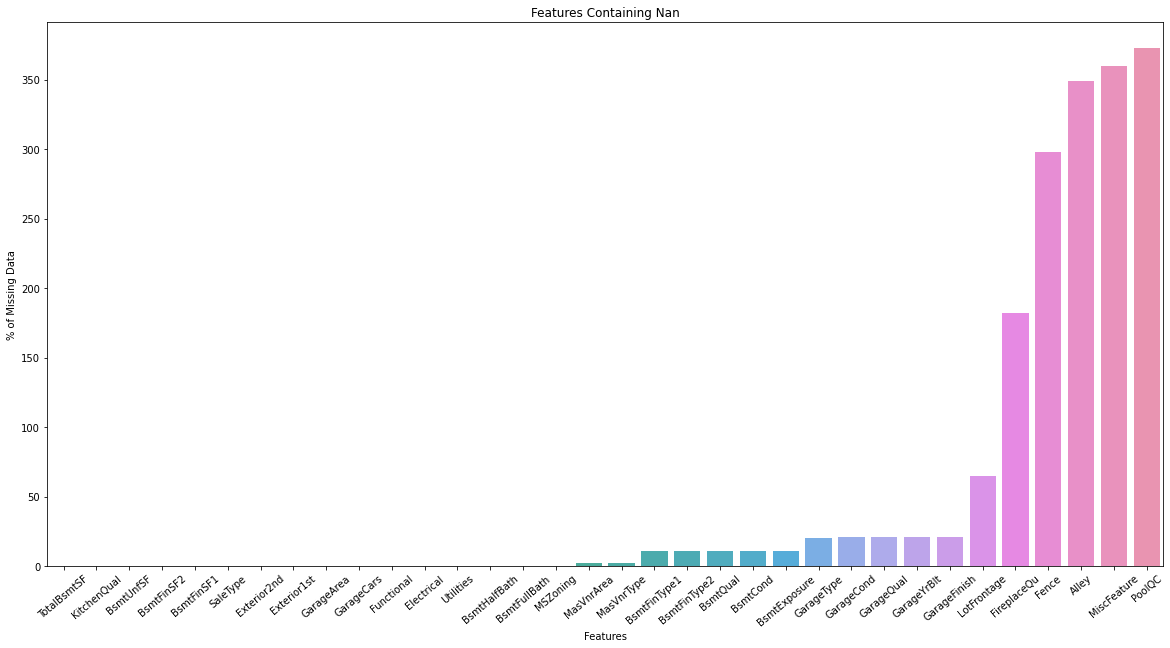

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(x=nan['feat'],y=nan['Percentage'])
plt.xticks(rotation=40)
plt.title('Features Containing Nan')
plt.xlabel('Features')
plt.ylabel('% of Missing Data')
plt.show()

In [31]:
# Filling Categorical NaN (That we know how to fill due to the description file )

train_test['Functional'] = train_test['Functional'].fillna('Typ')
train_test['Electrical'] = train_test['Electrical'].fillna("SBrkr")
train_test['KitchenQual'] = train_test['KitchenQual'].fillna("TA")
train_test['Exterior1st'] = train_test['Exterior1st'].fillna(train_test['Exterior1st'].mode()[0])
train_test['Exterior2nd'] = train_test['Exterior2nd'].fillna(train_test['Exterior2nd'].mode()[0])
train_test['SaleType'] = train_test['SaleType'].fillna(train_test['SaleType'].mode()[0])
train_test["PoolQC"] = train_test["PoolQC"].fillna("None")
train_test["Alley"] = train_test["Alley"].fillna("None")
train_test['FireplaceQu'] = train_test['FireplaceQu'].fillna("None")
train_test['Fence'] = train_test['Fence'].fillna("None")
train_test['MiscFeature'] = train_test['MiscFeature'].fillna("None")
for col in ('GarageArea', 'GarageCars'):
    train_test[col] = train_test[col].fillna(0)
        
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train_test[col] = train_test[col].fillna('None')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train_test[col] = train_test[col].fillna('None')
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea','BsmtUnfSF', 'TotalBsmtSF'):
    train_test[col] = train_test[col].fillna(0)

train_test['LotFrontage'] = train_test['LotFrontage'].fillna(train['LotFrontage'].median())
    
    # Checking the features with NaN remained out

for col in train_test:
    if train_test[col].isna().sum() > 0:
        print(train_test[col][1])

1    RH
1    RL
1    RL
Name: MSZoning, dtype: object
1    AllPub
1    AllPub
1    AllPub
Name: Utilities, dtype: object
1       None
1       None
1    BrkFace
Name: MasVnrType, dtype: object
1    1961.0
1    1976.0
1    1958.0
Name: GarageYrBlt, dtype: float64


In [32]:
# Converting non-numeric predictors stored as numbers into string

train_test['MSSubClass'] = train_test['MSSubClass'].apply(str)
train_test['YrSold'] = train_test['YrSold'].apply(str)
train_test['MoSold'] = train_test['MoSold'].apply(str)
train_test['OverallQual'] = train_test['OverallQual'].apply(str)
train_test['OverallCond'] = train_test['OverallCond'].apply(str)

In [33]:
train_test["SqFtPerRoom"] = train_test["GrLivArea"] / (train_test["TotRmsAbvGrd"] +
                                                       train_test["FullBath"] +
                                                       train_test["HalfBath"] +
                                                       train_test["KitchenAbvGr"])

train_test['Total_Home_Quality'] = train_test['OverallQual'] + train_test['OverallCond']

train_test['Total_Bathrooms'] = (train_test['FullBath'] + (0.5 * train_test['HalfBath']) +
                               train_test['BsmtFullBath'] + (0.5 * train_test['BsmtHalfBath']))

train_test["HighQualSF"] = train_test["1stFlrSF"] + train_test["2ndFlrSF"]
train_test['renovated']=train_test['YearRemodAdd']+train_test['YearBuilt']

In [34]:
# Removing the useless variables

useless = ['GarageYrBlt','YearRemodAdd'] 
train_test = train_test.drop(useless, axis = 1)

In [35]:
# Creating dummy variables from categorical features

from scipy.stats import skew

train_test_dummy = pd.get_dummies(train_test)

numeric_features = train_test_dummy.dtypes[train_test_dummy.dtypes != object].index
skewed_features = train_test_dummy[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

In [36]:
# Normalize skewed features using log_transformation
    
for i in skew_index:
    train_test_dummy[i] = np.log1p(train_test_dummy[i] )

Checking for Nan values after dummy

In [37]:
nan=pd.DataFrame(train_test_dummy.isna().sum(),columns=['Nan_sum'])
nan['feat']=nan.index
nan=nan[nan['Nan_sum']>0]
nan['Percentage']=(nan['Nan_sum']/1460)*100
nan['Perc']=(nan['Nan_sum']/5459)*100
nan=nan.sort_values(by=['Nan_sum'])
nan.insert(0,'Serial No.',range(1,len(nan)+1))
nan

Empty DataFrame
Columns: [Serial No., Nan_sum, feat, Percentage, Perc]
Index: []

checking if the values are in infinity or not after log transformation

In [38]:
inf=pd.DataFrame(np.isinf(train_test_dummy).sum() ,columns=['Inf_sum'])
inf['feat']=inf.index
inf=inf[inf['Inf_sum']>0]
inf=inf.sort_values(by=['Inf_sum'])
inf.insert(0,'Serial No.',range(1,len(inf)+1))
inf

Empty DataFrame
Columns: [Serial No., Inf_sum, feat]
Index: []

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


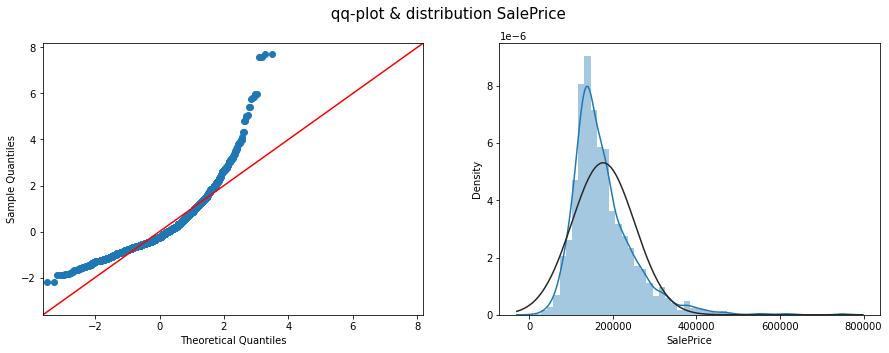

In [39]:
import statsmodels.api as sm
# SalePrice before transformation

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
#research sm 
sns.distplot(target, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


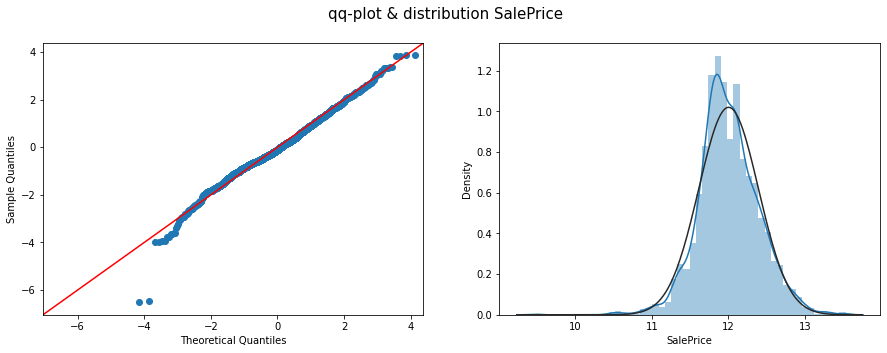

In [40]:
# SalePrice after transformation

target_log = np.log1p(target)

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle("qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_log, stats.t, distargs=(4,),fit=True, line="45", ax = ax[0])
sns.distplot(target_log, kde = True, hist=True, fit = norm, ax = ax[1])
plt.show()

In [41]:
import shap
from xgboost import XGBRegressor
from catboost import Pool
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [42]:
train_test.iloc[3999:4005]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1459         20       RL         75.0     9937   Pave  None      Reg   
0            20       RH         80.0    11622   Pave  None      Reg   
1            20       RL         81.0    14267   Pave  None      IR1   
2            60       RL         74.0    13830   Pave  None      IR1   
3            60       RL         78.0     9978   Pave  None      IR1   
4           120       RL         43.0     5005   Pave  None      IR1   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   
0            Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1            Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3            Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4            HLS    AllPub    Inside       Gtl      StoneBr       Norm   

     Condition2 BldgType HouseStyle OverallQual OverallCond  YearBuilt  \
1459       Norm     1Fam     1Story           5           6       1965   
0          Norm     1Fam     1Story           5           6       1961   
1          Norm     1Fam     1Story           6           6       1958   
2          Norm     1Fam     2Story           5           5       1997   
3          Norm     1Fam     2Story           6           6       1998   
4          Norm   TwnhsE     1Story           8           5       1992   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
1459     Gable  CompShg     HdBoard     HdBoard       None         0.0   
0        Gable  CompShg     VinylSd     VinylSd       None         0.0   
1          Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace       108.0   
2        Gable  CompShg     VinylSd     VinylSd       None         0.0   
3        Gable  CompShg     VinylSd     VinylSd    BrkFace        20.0   
4        Gable  CompShg     HdBoard     HdBoard       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
1459        Gd        TA     CBlock       TA       TA           No   
0           TA        TA     CBlock       TA       TA           No   
1           TA        TA     CBlock       TA       TA           No   
2           TA        TA      PConc       Gd       TA           No   
3           TA        TA      PConc       TA       TA           No   
4           Gd        TA      PConc       Gd       TA           No   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1459          BLQ       830.0          LwQ       290.0      136.0   
0             Rec       468.0          LwQ       144.0      270.0   
1             ALQ       923.0          Unf         0.0      406.0   
2             GLQ       791.0          Unf         0.0      137.0   
3             GLQ       602.0          Unf         0.0      324.0   
4             ALQ       263.0          Unf         0.0     1017.0   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
1459       1256.0    GasA        Gd          Y      SBrkr      1256         0   
0           882.0    GasA        TA          Y      SBrkr       896         0   
1          1329.0    GasA        TA          Y      SBrkr      1329         0   
2           928.0    GasA        Gd          Y      SBrkr       928       701   
3           926.0    GasA        Ex          Y      SBrkr       926       678   
4          1280.0    GasA        Ex          Y      SBrkr      1280         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1459             0       1256           1.0           0.0         1         1   
0                0        896           0.0           0.0         1         0   
1                0       1329           0.0           0.0         1         1   
2                0       1629           0.0           0.0         2         

In [43]:
# Train-Test separation

X_train = train_test_dummy[0:4000]
X_test = train_test_dummy[4000:]

# Creation of the RMSE metric:
    
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [44]:
# 10 Fold Cross validation

kf = KFold(n_splits=11, random_state=42, shuffle=True)

cv_scores = []
cv_std = []

baseline_models = ['Linear_Reg.','Bayesian_Ridge_Reg.','LGBM_Reg.','SVR',
                   'Dec_Tree_Reg.','Random_Forest_Reg.', 'XGB_Reg.',
                   'Grad_Boost_Reg.','Cat_Boost_Reg.','Ensembled_Reg.','Ensembled_Reg2']

In [45]:
# Linear Regression

lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

# Bayesian Ridge Regression

brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

# Light Gradient Boost Regressor

l_gbm = LGBMRegressor(objective='regression')
score_l_gbm = cv_rmse(l_gbm)
cv_scores.append(score_l_gbm.mean())
cv_std.append(score_l_gbm.std())

# Support Vector Regression

svr = SVR()
score_svr = cv_rmse(svr)
cv_scores.append(score_svr.mean())
cv_std.append(score_svr.std())

# Decision Tree Regressor

dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

# Random Forest Regressor

rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

# XGB Regressor

xgb = XGBRegressor()
score_xgb = cv_rmse(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

# Gradient Boost Regressor

gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())

# Cat Boost Regressor

catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

# Ensembled Regressor 1

stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
                                          BayesianRidge()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

Learning rate set to 0.050206
0:	learn: 0.3776607	total: 64.2ms	remaining: 1m 4s
1:	learn: 0.3654928	total: 70.5ms	remaining: 35.2s
2:	learn: 0.3535607	total: 76.6ms	remaining: 25.5s
3:	learn: 0.3420462	total: 83.2ms	remaining: 20.7s
4:	learn: 0.3310868	total: 89.2ms	remaining: 17.7s
5:	learn: 0.3209557	total: 95.2ms	remaining: 15.8s
6:	learn: 0.3110294	total: 101ms	remaining: 14.3s
7:	learn: 0.3019427	total: 107ms	remaining: 13.2s
8:	learn: 0.2927449	total: 113ms	remaining: 12.5s
9:	learn: 0.2841394	total: 119ms	remaining: 11.8s
10:	learn: 0.2762856	total: 125ms	remaining: 11.2s
11:	learn: 0.2687844	total: 131ms	remaining: 10.8s
12:	learn: 0.2612743	total: 136ms	remaining: 10.4s
13:	learn: 0.2545704	total: 142ms	remaining: 10s
14:	learn: 0.2480785	total: 148ms	remaining: 9.72s
15:	learn: 0.2419090	total: 154ms	remaining: 9.44s
16:	learn: 0.2366696	total: 159ms	remaining: 9.21s
17:	learn: 0.2313452	total: 165ms	remaining: 9s
18:	learn: 0.2264264	total: 171ms	remaining: 8.81s
19:	learn:

In [46]:
score_stack_gen = cv_rmse(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

Learning rate set to 0.050206
0:	learn: 0.3776607	total: 6.88ms	remaining: 6.87s
1:	learn: 0.3654928	total: 13.7ms	remaining: 6.83s
2:	learn: 0.3535607	total: 20.3ms	remaining: 6.74s
3:	learn: 0.3420462	total: 27ms	remaining: 6.72s
4:	learn: 0.3310868	total: 33.5ms	remaining: 6.67s
5:	learn: 0.3209557	total: 39.7ms	remaining: 6.58s
6:	learn: 0.3110294	total: 46ms	remaining: 6.53s
7:	learn: 0.3019427	total: 52.5ms	remaining: 6.51s
8:	learn: 0.2927449	total: 58.9ms	remaining: 6.49s
9:	learn: 0.2841394	total: 65ms	remaining: 6.44s
10:	learn: 0.2762856	total: 71.6ms	remaining: 6.44s
11:	learn: 0.2687844	total: 78.2ms	remaining: 6.43s
12:	learn: 0.2612743	total: 84.4ms	remaining: 6.41s
13:	learn: 0.2545704	total: 90.7ms	remaining: 6.39s
14:	learn: 0.2480785	total: 97.3ms	remaining: 6.39s
15:	learn: 0.2419090	total: 104ms	remaining: 6.37s
16:	learn: 0.2366696	total: 109ms	remaining: 6.33s
17:	learn: 0.2313452	total: 115ms	remaining: 6.28s
18:	learn: 0.2264264	total: 121ms	remaining: 6.23s
19

X has feature names, but BayesianRidge was fitted without feature names


Learning rate set to 0.050206
0:	learn: 0.3785352	total: 7.3ms	remaining: 7.29s
1:	learn: 0.3660584	total: 14.1ms	remaining: 7.01s
2:	learn: 0.3545982	total: 20.3ms	remaining: 6.75s
3:	learn: 0.3430691	total: 26.7ms	remaining: 6.65s
4:	learn: 0.3325246	total: 33ms	remaining: 6.58s
5:	learn: 0.3221487	total: 39.4ms	remaining: 6.53s
6:	learn: 0.3122713	total: 45.4ms	remaining: 6.44s
7:	learn: 0.3031468	total: 52ms	remaining: 6.45s
8:	learn: 0.2938894	total: 58.7ms	remaining: 6.46s
9:	learn: 0.2861976	total: 65.4ms	remaining: 6.48s
10:	learn: 0.2786040	total: 71.3ms	remaining: 6.41s
11:	learn: 0.2710430	total: 77.6ms	remaining: 6.39s
12:	learn: 0.2637480	total: 83.4ms	remaining: 6.33s
13:	learn: 0.2569365	total: 89.4ms	remaining: 6.3s
14:	learn: 0.2508094	total: 95.3ms	remaining: 6.25s
15:	learn: 0.2445669	total: 101ms	remaining: 6.21s
16:	learn: 0.2390615	total: 107ms	remaining: 6.18s
17:	learn: 0.2340653	total: 113ms	remaining: 6.18s
18:	learn: 0.2290841	total: 119ms	remaining: 6.16s
19

X has feature names, but BayesianRidge was fitted without feature names


Learning rate set to 0.050206
0:	learn: 0.3793311	total: 8ms	remaining: 7.99s
1:	learn: 0.3664384	total: 14.4ms	remaining: 7.21s
2:	learn: 0.3545814	total: 20.9ms	remaining: 6.94s
3:	learn: 0.3434377	total: 27.3ms	remaining: 6.79s
4:	learn: 0.3320287	total: 33.3ms	remaining: 6.63s
5:	learn: 0.3213948	total: 39.4ms	remaining: 6.52s
6:	learn: 0.3117287	total: 45.7ms	remaining: 6.48s
7:	learn: 0.3027007	total: 51.6ms	remaining: 6.4s
8:	learn: 0.2939075	total: 57.8ms	remaining: 6.37s
9:	learn: 0.2859033	total: 63.9ms	remaining: 6.32s
10:	learn: 0.2781472	total: 70ms	remaining: 6.29s
11:	learn: 0.2704477	total: 76ms	remaining: 6.26s
12:	learn: 0.2633974	total: 82ms	remaining: 6.23s
13:	learn: 0.2563558	total: 88.3ms	remaining: 6.22s
14:	learn: 0.2503850	total: 94.2ms	remaining: 6.19s
15:	learn: 0.2441783	total: 100ms	remaining: 6.17s
16:	learn: 0.2384870	total: 106ms	remaining: 6.15s
17:	learn: 0.2334110	total: 112ms	remaining: 6.12s
18:	learn: 0.2281540	total: 118ms	remaining: 6.12s
19:	le

X has feature names, but BayesianRidge was fitted without feature names


Learning rate set to 0.050206
0:	learn: 0.3829316	total: 7.26ms	remaining: 7.26s
1:	learn: 0.3697558	total: 13.4ms	remaining: 6.71s
2:	learn: 0.3577624	total: 19.7ms	remaining: 6.55s
3:	learn: 0.3458736	total: 26ms	remaining: 6.46s
4:	learn: 0.3353482	total: 32.4ms	remaining: 6.45s
5:	learn: 0.3245292	total: 38.4ms	remaining: 6.37s
6:	learn: 0.3142850	total: 44.6ms	remaining: 6.32s
7:	learn: 0.3048710	total: 50.3ms	remaining: 6.24s
8:	learn: 0.2961750	total: 56.2ms	remaining: 6.19s
9:	learn: 0.2878231	total: 62.1ms	remaining: 6.15s
10:	learn: 0.2797852	total: 68.2ms	remaining: 6.13s
11:	learn: 0.2725572	total: 74ms	remaining: 6.09s
12:	learn: 0.2655132	total: 79.7ms	remaining: 6.05s
13:	learn: 0.2583980	total: 85.5ms	remaining: 6.02s
14:	learn: 0.2523011	total: 91.2ms	remaining: 5.99s
15:	learn: 0.2459764	total: 96.7ms	remaining: 5.95s
16:	learn: 0.2402683	total: 102ms	remaining: 5.91s
17:	learn: 0.2350787	total: 108ms	remaining: 5.89s
18:	learn: 0.2297372	total: 114ms	remaining: 5.88s

X has feature names, but BayesianRidge was fitted without feature names


Learning rate set to 0.050206
0:	learn: 0.3773616	total: 8ms	remaining: 7.99s
1:	learn: 0.3656304	total: 13.9ms	remaining: 6.92s
2:	learn: 0.3531543	total: 20.2ms	remaining: 6.72s
3:	learn: 0.3415481	total: 26.3ms	remaining: 6.54s
4:	learn: 0.3312305	total: 32.1ms	remaining: 6.4s
5:	learn: 0.3212374	total: 38ms	remaining: 6.3s
6:	learn: 0.3117924	total: 44.3ms	remaining: 6.29s
7:	learn: 0.3025134	total: 50.5ms	remaining: 6.26s
8:	learn: 0.2936902	total: 56.8ms	remaining: 6.26s
9:	learn: 0.2851045	total: 63.1ms	remaining: 6.24s
10:	learn: 0.2771089	total: 69.6ms	remaining: 6.26s
11:	learn: 0.2700603	total: 75.7ms	remaining: 6.23s
12:	learn: 0.2628945	total: 82.1ms	remaining: 6.24s
13:	learn: 0.2558191	total: 88ms	remaining: 6.2s
14:	learn: 0.2499549	total: 93.7ms	remaining: 6.15s
15:	learn: 0.2444029	total: 99.6ms	remaining: 6.13s
16:	learn: 0.2396317	total: 105ms	remaining: 6.09s
17:	learn: 0.2341129	total: 111ms	remaining: 6.04s
18:	learn: 0.2286145	total: 117ms	remaining: 6.05s
19:	l

X has feature names, but BayesianRidge was fitted without feature names


Learning rate set to 0.050206
0:	learn: 0.3772726	total: 6.39ms	remaining: 6.39s
1:	learn: 0.3647839	total: 12.4ms	remaining: 6.17s
2:	learn: 0.3528047	total: 18.4ms	remaining: 6.11s
3:	learn: 0.3414457	total: 24.1ms	remaining: 6s
4:	learn: 0.3306402	total: 30.4ms	remaining: 6.05s
5:	learn: 0.3198921	total: 36.6ms	remaining: 6.06s
6:	learn: 0.3103225	total: 42.6ms	remaining: 6.04s
7:	learn: 0.3008603	total: 48.3ms	remaining: 5.98s
8:	learn: 0.2922400	total: 54.7ms	remaining: 6.03s
9:	learn: 0.2837138	total: 61ms	remaining: 6.04s
10:	learn: 0.2760588	total: 67.4ms	remaining: 6.06s
11:	learn: 0.2688674	total: 73.4ms	remaining: 6.04s
12:	learn: 0.2621018	total: 79.8ms	remaining: 6.05s
13:	learn: 0.2556279	total: 85.8ms	remaining: 6.04s
14:	learn: 0.2491906	total: 92.1ms	remaining: 6.04s
15:	learn: 0.2434019	total: 98.2ms	remaining: 6.04s
16:	learn: 0.2371655	total: 104ms	remaining: 6.02s
17:	learn: 0.2319914	total: 110ms	remaining: 6s
18:	learn: 0.2267981	total: 116ms	remaining: 5.99s
19:

X has feature names, but BayesianRidge was fitted without feature names


Learning rate set to 0.050206
0:	learn: 0.3782726	total: 6.47ms	remaining: 6.46s
1:	learn: 0.3657775	total: 13.2ms	remaining: 6.59s
2:	learn: 0.3542380	total: 19.5ms	remaining: 6.47s
3:	learn: 0.3438875	total: 25.2ms	remaining: 6.29s
4:	learn: 0.3329774	total: 31.3ms	remaining: 6.24s
5:	learn: 0.3231056	total: 37.4ms	remaining: 6.2s
6:	learn: 0.3131021	total: 43.3ms	remaining: 6.15s
7:	learn: 0.3038494	total: 49ms	remaining: 6.07s
8:	learn: 0.2951753	total: 54.5ms	remaining: 6s
9:	learn: 0.2867923	total: 60.7ms	remaining: 6.01s
10:	learn: 0.2793195	total: 67.2ms	remaining: 6.04s
11:	learn: 0.2717500	total: 73.1ms	remaining: 6.02s
12:	learn: 0.2644862	total: 78.9ms	remaining: 5.99s
13:	learn: 0.2576423	total: 84.4ms	remaining: 5.95s
14:	learn: 0.2512516	total: 90.3ms	remaining: 5.93s
15:	learn: 0.2455322	total: 96ms	remaining: 5.9s
16:	learn: 0.2397956	total: 102ms	remaining: 5.88s
17:	learn: 0.2347702	total: 107ms	remaining: 5.86s
18:	learn: 0.2295509	total: 113ms	remaining: 5.83s
19:	

X has feature names, but BayesianRidge was fitted without feature names


Learning rate set to 0.050208
0:	learn: 0.3798517	total: 8.03ms	remaining: 8.02s
1:	learn: 0.3674238	total: 14.7ms	remaining: 7.33s
2:	learn: 0.3551216	total: 21.5ms	remaining: 7.15s
3:	learn: 0.3435471	total: 28.1ms	remaining: 6.99s
4:	learn: 0.3327541	total: 34.6ms	remaining: 6.89s
5:	learn: 0.3226969	total: 41.1ms	remaining: 6.8s
6:	learn: 0.3131232	total: 47.2ms	remaining: 6.69s
7:	learn: 0.3036136	total: 53.1ms	remaining: 6.59s
8:	learn: 0.2946105	total: 59.6ms	remaining: 6.56s
9:	learn: 0.2861422	total: 66.3ms	remaining: 6.57s
10:	learn: 0.2778120	total: 72.9ms	remaining: 6.55s
11:	learn: 0.2703975	total: 79.4ms	remaining: 6.54s
12:	learn: 0.2632264	total: 85.8ms	remaining: 6.52s
13:	learn: 0.2561419	total: 91.8ms	remaining: 6.47s
14:	learn: 0.2499424	total: 98.3ms	remaining: 6.46s
15:	learn: 0.2436114	total: 104ms	remaining: 6.42s
16:	learn: 0.2377316	total: 110ms	remaining: 6.38s
17:	learn: 0.2326572	total: 116ms	remaining: 6.35s
18:	learn: 0.2273520	total: 122ms	remaining: 6.3

X has feature names, but BayesianRidge was fitted without feature names


Learning rate set to 0.050208
0:	learn: 0.3791517	total: 6.44ms	remaining: 6.43s
1:	learn: 0.3670143	total: 12.6ms	remaining: 6.3s
2:	learn: 0.3544687	total: 18.9ms	remaining: 6.29s
3:	learn: 0.3431019	total: 25.1ms	remaining: 6.25s
4:	learn: 0.3327623	total: 31.3ms	remaining: 6.23s
5:	learn: 0.3225591	total: 37.1ms	remaining: 6.15s
6:	learn: 0.3127919	total: 43.3ms	remaining: 6.14s
7:	learn: 0.3033029	total: 49.5ms	remaining: 6.13s
8:	learn: 0.2946664	total: 55.9ms	remaining: 6.15s
9:	learn: 0.2860254	total: 62.9ms	remaining: 6.22s
10:	learn: 0.2781634	total: 69.6ms	remaining: 6.26s
11:	learn: 0.2709084	total: 76.1ms	remaining: 6.26s
12:	learn: 0.2636374	total: 82.2ms	remaining: 6.24s
13:	learn: 0.2573122	total: 88.5ms	remaining: 6.24s
14:	learn: 0.2516029	total: 95.1ms	remaining: 6.24s
15:	learn: 0.2453087	total: 101ms	remaining: 6.24s
16:	learn: 0.2399065	total: 108ms	remaining: 6.24s
17:	learn: 0.2346962	total: 114ms	remaining: 6.21s
18:	learn: 0.2294461	total: 120ms	remaining: 6.2

X has feature names, but BayesianRidge was fitted without feature names


Learning rate set to 0.050208
0:	learn: 0.3791137	total: 7.21ms	remaining: 7.2s
1:	learn: 0.3671061	total: 13.4ms	remaining: 6.7s
2:	learn: 0.3546047	total: 19.3ms	remaining: 6.41s
3:	learn: 0.3436369	total: 25.6ms	remaining: 6.36s
4:	learn: 0.3329840	total: 31.6ms	remaining: 6.29s
5:	learn: 0.3232539	total: 38ms	remaining: 6.29s
6:	learn: 0.3132442	total: 44.1ms	remaining: 6.26s
7:	learn: 0.3038353	total: 50.3ms	remaining: 6.24s
8:	learn: 0.2945696	total: 56.2ms	remaining: 6.18s
9:	learn: 0.2863889	total: 62ms	remaining: 6.14s
10:	learn: 0.2785525	total: 68.3ms	remaining: 6.14s
11:	learn: 0.2708093	total: 74.6ms	remaining: 6.14s
12:	learn: 0.2635268	total: 80.4ms	remaining: 6.1s
13:	learn: 0.2568003	total: 86.4ms	remaining: 6.09s
14:	learn: 0.2502487	total: 92.4ms	remaining: 6.07s
15:	learn: 0.2445686	total: 98.3ms	remaining: 6.05s
16:	learn: 0.2398340	total: 104ms	remaining: 5.99s
17:	learn: 0.2343218	total: 110ms	remaining: 5.99s
18:	learn: 0.2292210	total: 116ms	remaining: 5.99s
19

X has feature names, but BayesianRidge was fitted without feature names


Learning rate set to 0.050208
0:	learn: 0.3719063	total: 7.29ms	remaining: 7.28s
1:	learn: 0.3597300	total: 14.4ms	remaining: 7.16s
2:	learn: 0.3478300	total: 20.8ms	remaining: 6.92s
3:	learn: 0.3372528	total: 27.5ms	remaining: 6.86s
4:	learn: 0.3265085	total: 33.3ms	remaining: 6.63s
5:	learn: 0.3168303	total: 39ms	remaining: 6.47s
6:	learn: 0.3073710	total: 44.8ms	remaining: 6.36s
7:	learn: 0.2980840	total: 50.4ms	remaining: 6.25s
8:	learn: 0.2898517	total: 56ms	remaining: 6.16s
9:	learn: 0.2815921	total: 61.9ms	remaining: 6.13s
10:	learn: 0.2732844	total: 67.7ms	remaining: 6.09s
11:	learn: 0.2659998	total: 73.5ms	remaining: 6.05s
12:	learn: 0.2594439	total: 79.7ms	remaining: 6.05s
13:	learn: 0.2527114	total: 85.8ms	remaining: 6.04s
14:	learn: 0.2468170	total: 91.4ms	remaining: 6s
15:	learn: 0.2407888	total: 97.4ms	remaining: 5.99s
16:	learn: 0.2352097	total: 103ms	remaining: 5.98s
17:	learn: 0.2299568	total: 109ms	remaining: 5.96s
18:	learn: 0.2246622	total: 115ms	remaining: 5.94s
19

X has feature names, but BayesianRidge was fitted without feature names


In [47]:
# Ensembled Regressor 2

stack_gen2 = StackingRegressor(regressors=(CatBoostRegressor(),
                                          XGBRegressor()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

score_stack_gen2 = cv_rmse(stack_gen2)
cv_scores.append(score_stack_gen2.mean())
cv_std.append(score_stack_gen2.std())

Learning rate set to 0.050206
0:	learn: 0.3776607	total: 6.36ms	remaining: 6.36s
1:	learn: 0.3654928	total: 12.7ms	remaining: 6.33s
2:	learn: 0.3535607	total: 19.1ms	remaining: 6.36s
3:	learn: 0.3420462	total: 25.6ms	remaining: 6.38s
4:	learn: 0.3310868	total: 31.6ms	remaining: 6.28s
5:	learn: 0.3209557	total: 37.6ms	remaining: 6.23s
6:	learn: 0.3110294	total: 43.3ms	remaining: 6.14s
7:	learn: 0.3019427	total: 50ms	remaining: 6.2s
8:	learn: 0.2927449	total: 56.8ms	remaining: 6.26s
9:	learn: 0.2841394	total: 63.2ms	remaining: 6.26s
10:	learn: 0.2762856	total: 69.8ms	remaining: 6.28s
11:	learn: 0.2687844	total: 76.5ms	remaining: 6.3s
12:	learn: 0.2612743	total: 83.3ms	remaining: 6.32s
13:	learn: 0.2545704	total: 89.6ms	remaining: 6.31s
14:	learn: 0.2480785	total: 96.3ms	remaining: 6.32s
15:	learn: 0.2419090	total: 102ms	remaining: 6.3s
16:	learn: 0.2366696	total: 109ms	remaining: 6.29s
17:	learn: 0.2313452	total: 115ms	remaining: 6.27s
18:	learn: 0.2264264	total: 121ms	remaining: 6.23s
1

In [48]:
final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

In [49]:
final_cv_score

Regressors  RMSE_mean  RMSE_std
0           Linear_Reg.   0.117055  0.013781
1   Bayesian_Ridge_Reg.   0.113387  0.015812
2             LGBM_Reg.   0.096024  0.020321
3                   SVR   0.265387  0.020976
4         Dec_Tree_Reg.   0.129893  0.017362
5    Random_Forest_Reg.   0.099650  0.019830
6              XGB_Reg.   0.089323  0.022510
7       Grad_Boost_Reg.   0.115577  0.020640
8        Cat_Boost_Reg.   0.087016  0.020277
9        Ensembled_Reg.   0.082506  0.019896
10       Ensembled_Reg2   0.083639  0.020214

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


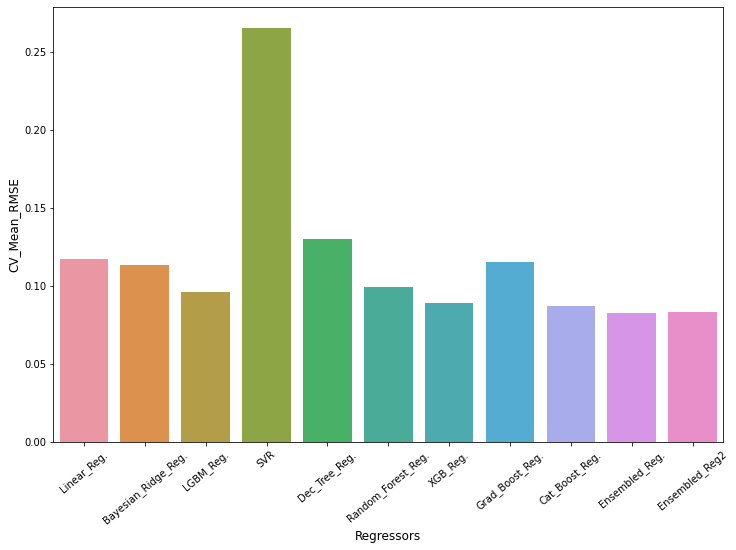

In [50]:
plt.figure(figsize = (12,8))
sns.barplot(final_cv_score['Regressors'],final_cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=40)
plt.show()

Extracting all the important features using CatBoost

In [51]:
cat = CatBoostRegressor()
cat_model = cat.fit(X_train,target_log,
                     plot=True,
                     verbose = 0)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [52]:
feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp.head()

Feature Id  Importances
0   HighQualSF    11.915021
1    renovated     8.439200
2  TotalBsmtSF     6.788115
3    GrLivArea     5.202836
4     1stFlrSF     5.159744

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


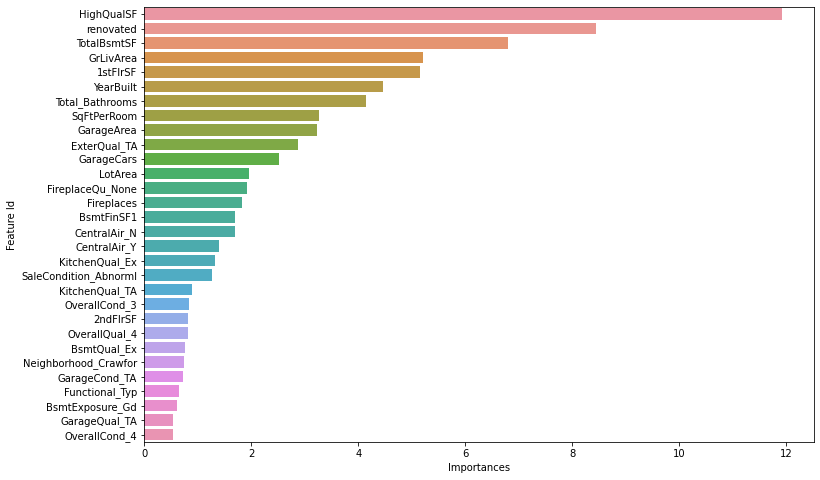

In [53]:
# Plotting top 30 features' importance

plt.figure(figsize = (12,8))
sns.barplot(feat_imp['Importances'][:30],feat_imp['Feature Id'][:30], orient = 'h')
plt.show()

In [54]:
params = {'iterations': 6000,
          'learning_rate': 0.005,
          'depth': 4,
          'l2_leaf_reg': 1,
          'eval_metric':'RMSE',
          'early_stopping_rounds': 200,
          'verbose': 200,
          'random_seed': 42}
         
cat_f = CatBoostRegressor(**params)
cat_model_f = cat_f.fit(X_train,target_log,
                     plot=True,
                     verbose = False)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Creating the submission files. Using the best 3 models for submission

In [55]:
test_pred = cat_f.predict(X_test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pred = np.expm1(test_pred)
submission['SalePrice'] = test_pred 
submission.head()
submission.to_csv("cat.csv", index = False, header = True)

In [56]:
stack_f=stack_gen.fit(X_train,target_log)
test_stack = stack_gen.predict(X_test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pre = np.expm1(test_stack)
submission['SalePrice'] = test_pre

submission.to_csv("ensemble1.csv", index = False, header = True)

Learning rate set to 0.050969
0:	learn: 0.3784411	total: 8.37ms	remaining: 8.36s
1:	learn: 0.3652807	total: 14.4ms	remaining: 7.21s
2:	learn: 0.3534081	total: 20.7ms	remaining: 6.88s
3:	learn: 0.3420829	total: 27.3ms	remaining: 6.79s
4:	learn: 0.3318730	total: 33.3ms	remaining: 6.62s
5:	learn: 0.3212258	total: 40.6ms	remaining: 6.73s
6:	learn: 0.3119406	total: 47ms	remaining: 6.66s
7:	learn: 0.3023667	total: 53.1ms	remaining: 6.59s
8:	learn: 0.2932127	total: 59.1ms	remaining: 6.51s
9:	learn: 0.2847621	total: 65ms	remaining: 6.44s
10:	learn: 0.2765845	total: 72.3ms	remaining: 6.5s
11:	learn: 0.2695054	total: 78.7ms	remaining: 6.48s
12:	learn: 0.2622095	total: 84.9ms	remaining: 6.44s
13:	learn: 0.2553176	total: 91.1ms	remaining: 6.41s
14:	learn: 0.2488193	total: 97.1ms	remaining: 6.37s
15:	learn: 0.2426181	total: 104ms	remaining: 6.37s
16:	learn: 0.2365861	total: 110ms	remaining: 6.35s
17:	learn: 0.2311272	total: 116ms	remaining: 6.34s
18:	learn: 0.2262082	total: 123ms	remaining: 6.33s
1

X has feature names, but BayesianRidge was fitted without feature names


In [57]:
stack_f2=stack_gen2.fit(X_train,target_log)
test_stack = stack_gen2.predict(X_test)
submission = pd.DataFrame(test_id, columns = ['Id'])
test_pre = np.expm1(test_stack)
submission['SalePrice'] = test_pre

submission.to_csv("ensemble2.csv", index = False, header = True)

Learning rate set to 0.050969
0:	learn: 0.3784411	total: 7.85ms	remaining: 7.84s
1:	learn: 0.3652807	total: 13.8ms	remaining: 6.91s
2:	learn: 0.3534081	total: 19.9ms	remaining: 6.6s
3:	learn: 0.3420829	total: 26.1ms	remaining: 6.5s
4:	learn: 0.3318730	total: 32ms	remaining: 6.37s
5:	learn: 0.3212258	total: 38.4ms	remaining: 6.36s
6:	learn: 0.3119406	total: 46.6ms	remaining: 6.62s
7:	learn: 0.3023667	total: 53ms	remaining: 6.57s
8:	learn: 0.2932127	total: 59ms	remaining: 6.5s
9:	learn: 0.2847621	total: 65.6ms	remaining: 6.49s
10:	learn: 0.2765845	total: 72ms	remaining: 6.47s
11:	learn: 0.2695054	total: 78.3ms	remaining: 6.45s
12:	learn: 0.2622095	total: 84.6ms	remaining: 6.43s
13:	learn: 0.2553176	total: 90.9ms	remaining: 6.4s
14:	learn: 0.2488193	total: 97.4ms	remaining: 6.4s
15:	learn: 0.2426181	total: 104ms	remaining: 6.39s
16:	learn: 0.2365861	total: 110ms	remaining: 6.39s
17:	learn: 0.2311272	total: 117ms	remaining: 6.39s
18:	learn: 0.2262082	total: 124ms	remaining: 6.38s
19:	learn